# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Steven Faustin Orginata
- Email: stevenfo0711@gmail.com
- Id Dicoding: steven-fo

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import joblib

### Menyiapkan data yang akan diguankan

In [2]:
df = pd.read_csv('data/data.csv', sep=';')
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [4]:
df.shape

(4424, 37)

In [5]:
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [6]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
numerical_cols = ['Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment',
                  'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations',
                  'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations',
                  'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations',
                  'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations']

In [9]:
categorical_cols = ['Marital_status', 'Application_order', 'Application_mode', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 
                    'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
                    'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
                    'International']

In [10]:
def detect_outliers_iqr(df):
    """
    Detect outliers using IQR method for all numerical columns and create boxplots
    
    Parameters:
    df: pandas DataFrame
    
    Returns:
    dict: Dictionary with column names as keys and outlier indices as values
    """
    outliers = {}
    
    # Get numerical columns
    numeric_df = df[numerical_cols].copy()
    numeric_cols = numeric_df.columns
    
    # Create boxplots
    n_cols = len(numeric_cols)
    if n_cols > 0:
        n_rows = (n_cols + 2) // 3
        fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
        
        if n_cols == 1:
            axes = [axes]
        elif n_rows == 1:
            axes = axes.reshape(1, -1)
        
        axes = axes.flatten()
        
        for i, col in enumerate(numeric_cols):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Find outlier indices
            outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
            outliers[col] = outlier_indices.tolist()
            
            # Create boxplot
            axes[i].boxplot(df[col].dropna())
            axes[i].set_title(f'{col}\nOutliers: {len(outlier_indices)} ({len(outlier_indices)/len(df)*100:.2f}%)')
            axes[i].set_ylabel(col)
            axes[i].grid(True, alpha=0.3)
            
            print(f"{col}: {len(outlier_indices)} outliers ({len(outlier_indices)/len(df)*100:.2f}%)")
        
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        
        plt.tight_layout()
        plt.show()
    
    return outliers

Previous_qualification_grade: 179 outliers (4.05%)
Admission_grade: 86 outliers (1.94%)
Age_at_enrollment: 441 outliers (9.97%)
Curricular_units_1st_sem_credited: 577 outliers (13.04%)
Curricular_units_1st_sem_enrolled: 424 outliers (9.58%)
Curricular_units_1st_sem_evaluations: 158 outliers (3.57%)
Curricular_units_1st_sem_approved: 180 outliers (4.07%)
Curricular_units_1st_sem_grade: 726 outliers (16.41%)
Curricular_units_1st_sem_without_evaluations: 294 outliers (6.65%)
Curricular_units_2nd_sem_credited: 530 outliers (11.98%)
Curricular_units_2nd_sem_enrolled: 369 outliers (8.34%)
Curricular_units_2nd_sem_evaluations: 109 outliers (2.46%)
Curricular_units_2nd_sem_approved: 44 outliers (0.99%)
Curricular_units_2nd_sem_grade: 877 outliers (19.82%)
Curricular_units_2nd_sem_without_evaluations: 282 outliers (6.37%)


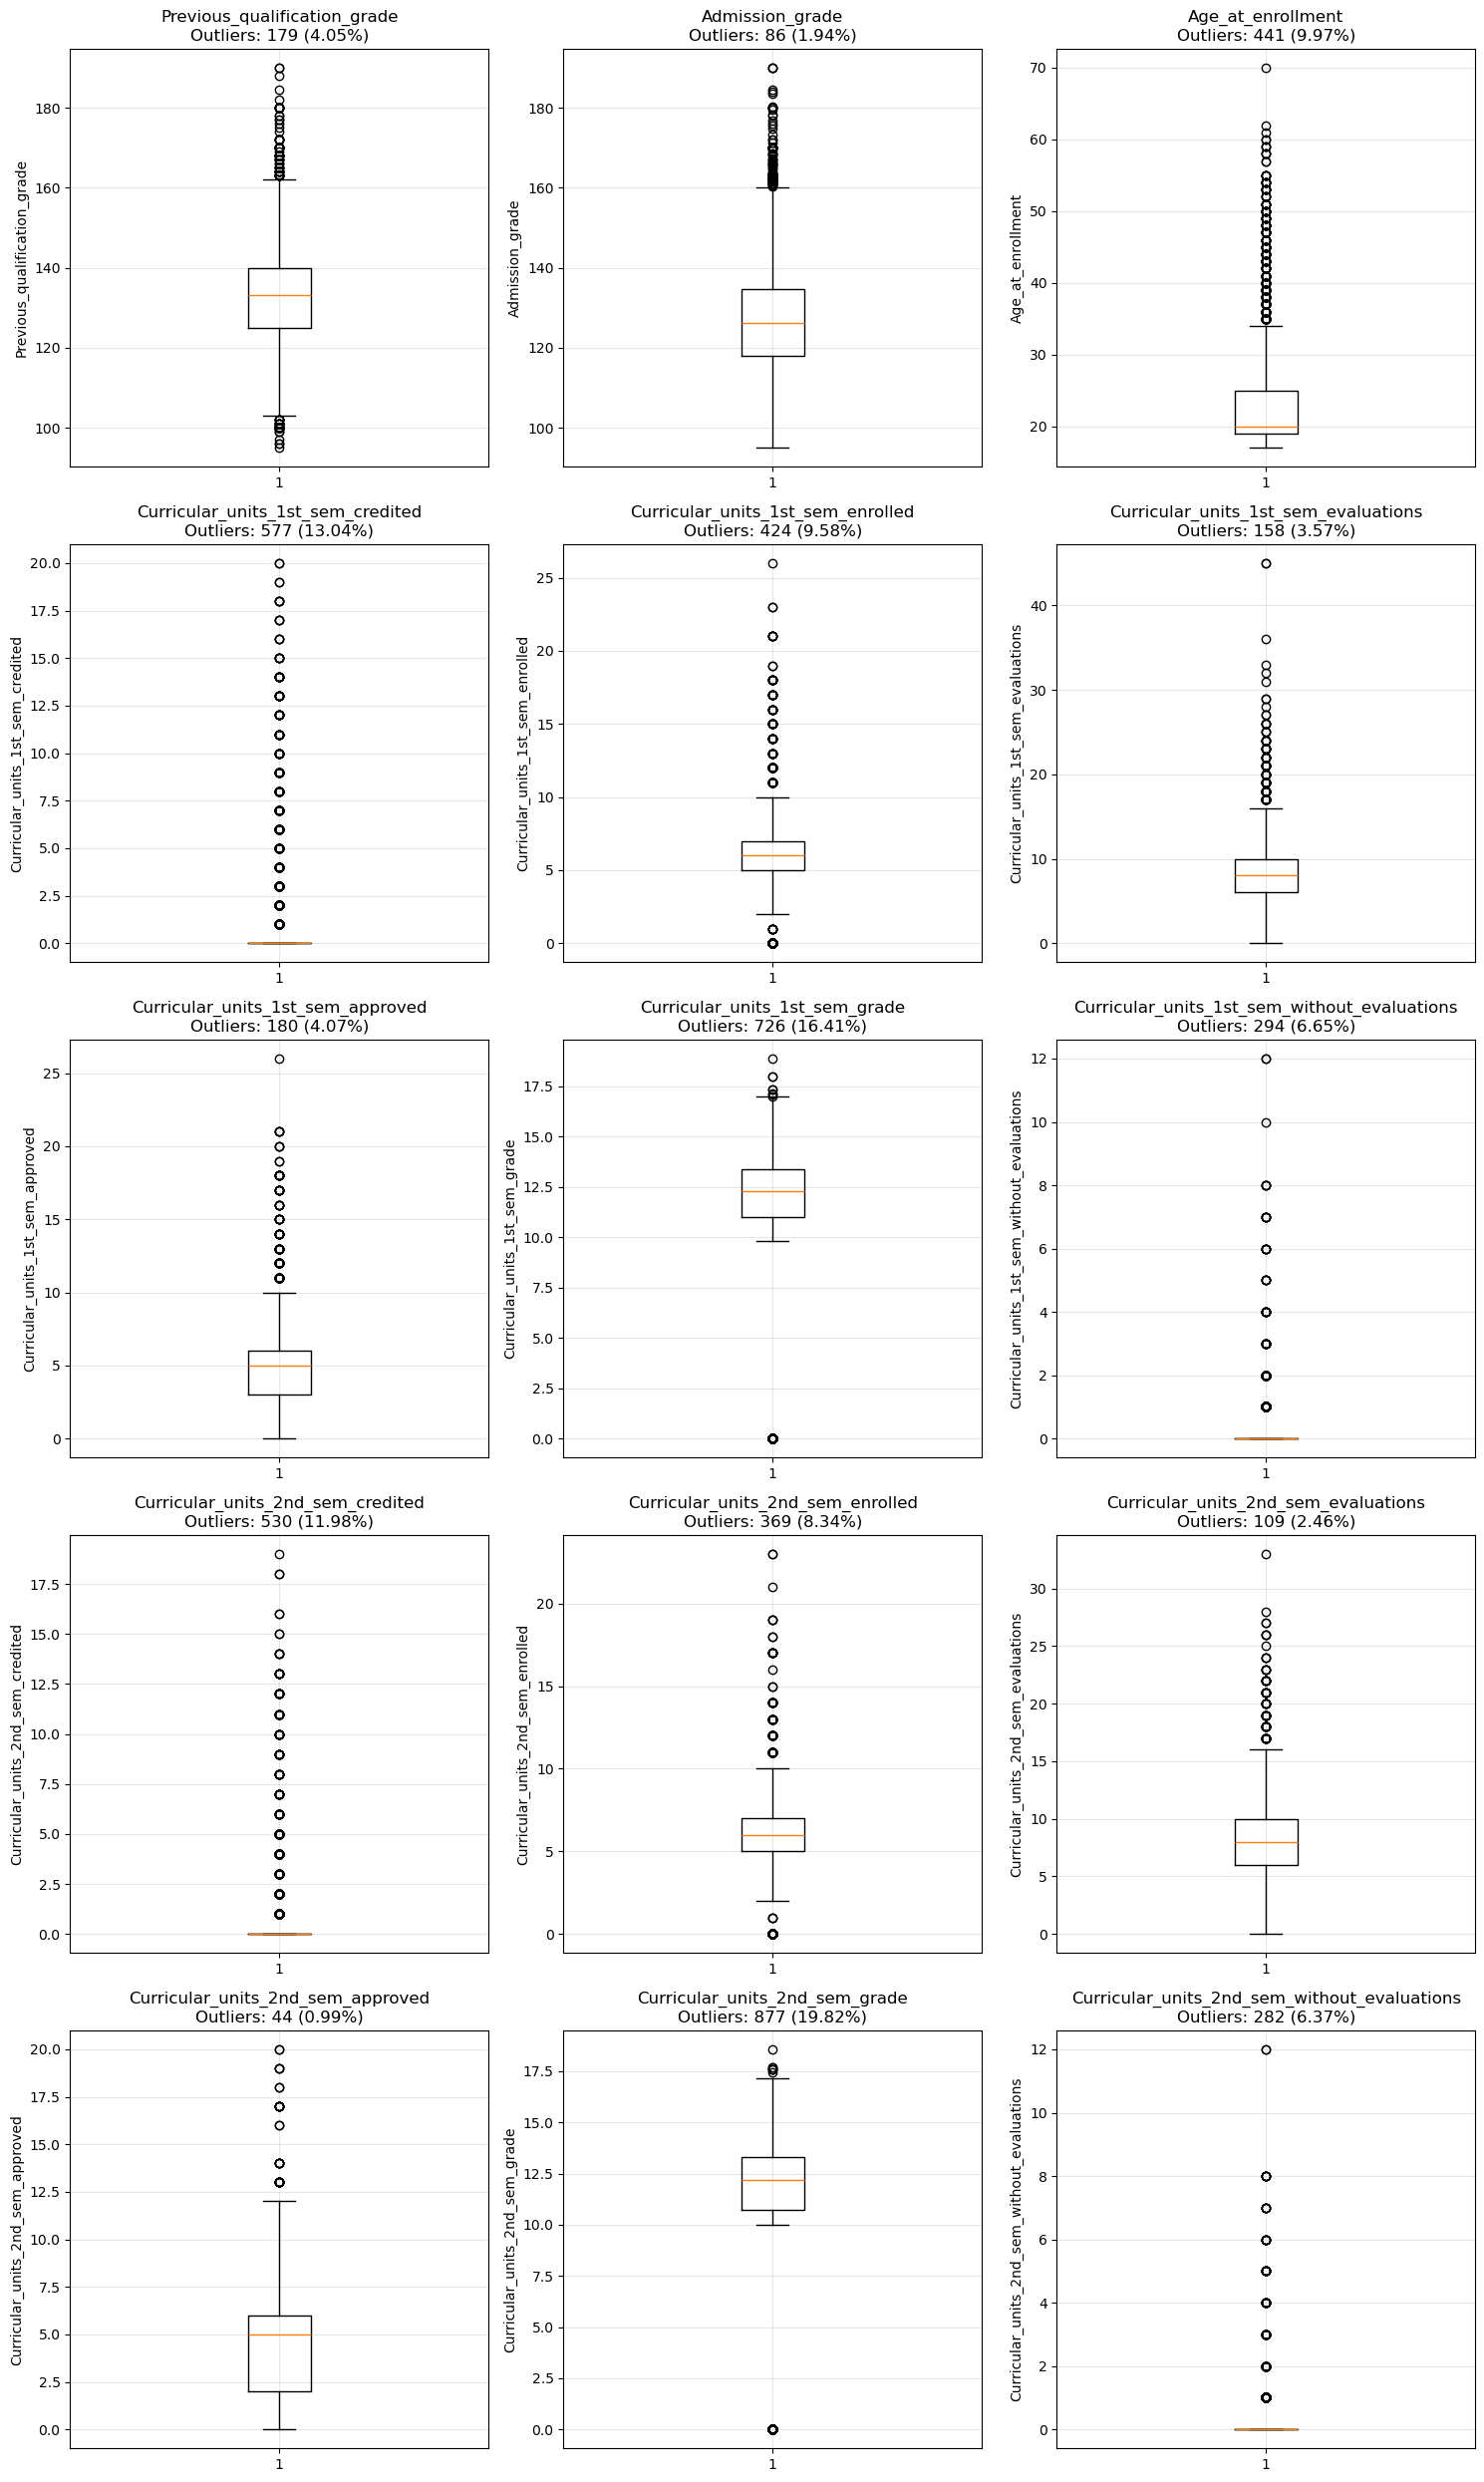

In [11]:
outliers = detect_outliers_iqr(df)

## Data Preparation / Preprocessing

In [12]:
def remove_outliers_iqr(df, threshold=1.5):
    """
    Remove outliers using IQR method with custom threshold
    
    Parameters:
    df: pandas DataFrame
    threshold: float, IQR multiplier for outlier detection
    
    Returns:
    pandas DataFrame: DataFrame with outliers removed
    """
    # Get numerical columns only
    numeric_df = df[numerical_cols].copy()
    df_clean = df.copy()
    
    outlier_indices = set()
    
    for col in numeric_df.columns:
        Q1 = numeric_df[col].quantile(0.25)
        Q3 = numeric_df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        # Find outlier indices for this column
        col_outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)].index
        outlier_indices.update(col_outliers)
        
        print(f"{col}: {len(col_outliers)} outliers removed")
    
    df_clean = df_clean.drop(outlier_indices)
    
    print(f"\nTotal rows removed: {len(outlier_indices)}")
    print(f"Original shape: {df.shape}")
    print(f"Clean shape: {df_clean.shape}")
    
    return df_clean


In [13]:
df_clean = remove_outliers_iqr(df, 2.5)

Previous_qualification_grade: 16 outliers removed
Admission_grade: 14 outliers removed
Age_at_enrollment: 225 outliers removed
Curricular_units_1st_sem_credited: 577 outliers removed
Curricular_units_1st_sem_enrolled: 126 outliers removed
Curricular_units_1st_sem_evaluations: 60 outliers removed
Curricular_units_1st_sem_approved: 61 outliers removed
Curricular_units_1st_sem_grade: 718 outliers removed
Curricular_units_1st_sem_without_evaluations: 294 outliers removed
Curricular_units_2nd_sem_credited: 530 outliers removed
Curricular_units_2nd_sem_enrolled: 82 outliers removed
Curricular_units_2nd_sem_evaluations: 35 outliers removed
Curricular_units_2nd_sem_approved: 15 outliers removed
Curricular_units_2nd_sem_grade: 870 outliers removed
Curricular_units_2nd_sem_without_evaluations: 282 outliers removed

Total rows removed: 1840
Original shape: (4424, 37)
Clean shape: (2584, 37)


Previous_qualification_grade: 73 outliers (2.83%)
Admission_grade: 76 outliers (2.94%)
Age_at_enrollment: 275 outliers (10.64%)
Curricular_units_1st_sem_credited: 0 outliers (0.00%)
Curricular_units_1st_sem_enrolled: 3 outliers (0.12%)
Curricular_units_1st_sem_evaluations: 145 outliers (5.61%)
Curricular_units_1st_sem_approved: 332 outliers (12.85%)
Curricular_units_1st_sem_grade: 18 outliers (0.70%)
Curricular_units_1st_sem_without_evaluations: 0 outliers (0.00%)
Curricular_units_2nd_sem_credited: 0 outliers (0.00%)
Curricular_units_2nd_sem_enrolled: 5 outliers (0.19%)
Curricular_units_2nd_sem_evaluations: 151 outliers (5.84%)
Curricular_units_2nd_sem_approved: 0 outliers (0.00%)
Curricular_units_2nd_sem_grade: 12 outliers (0.46%)
Curricular_units_2nd_sem_without_evaluations: 0 outliers (0.00%)


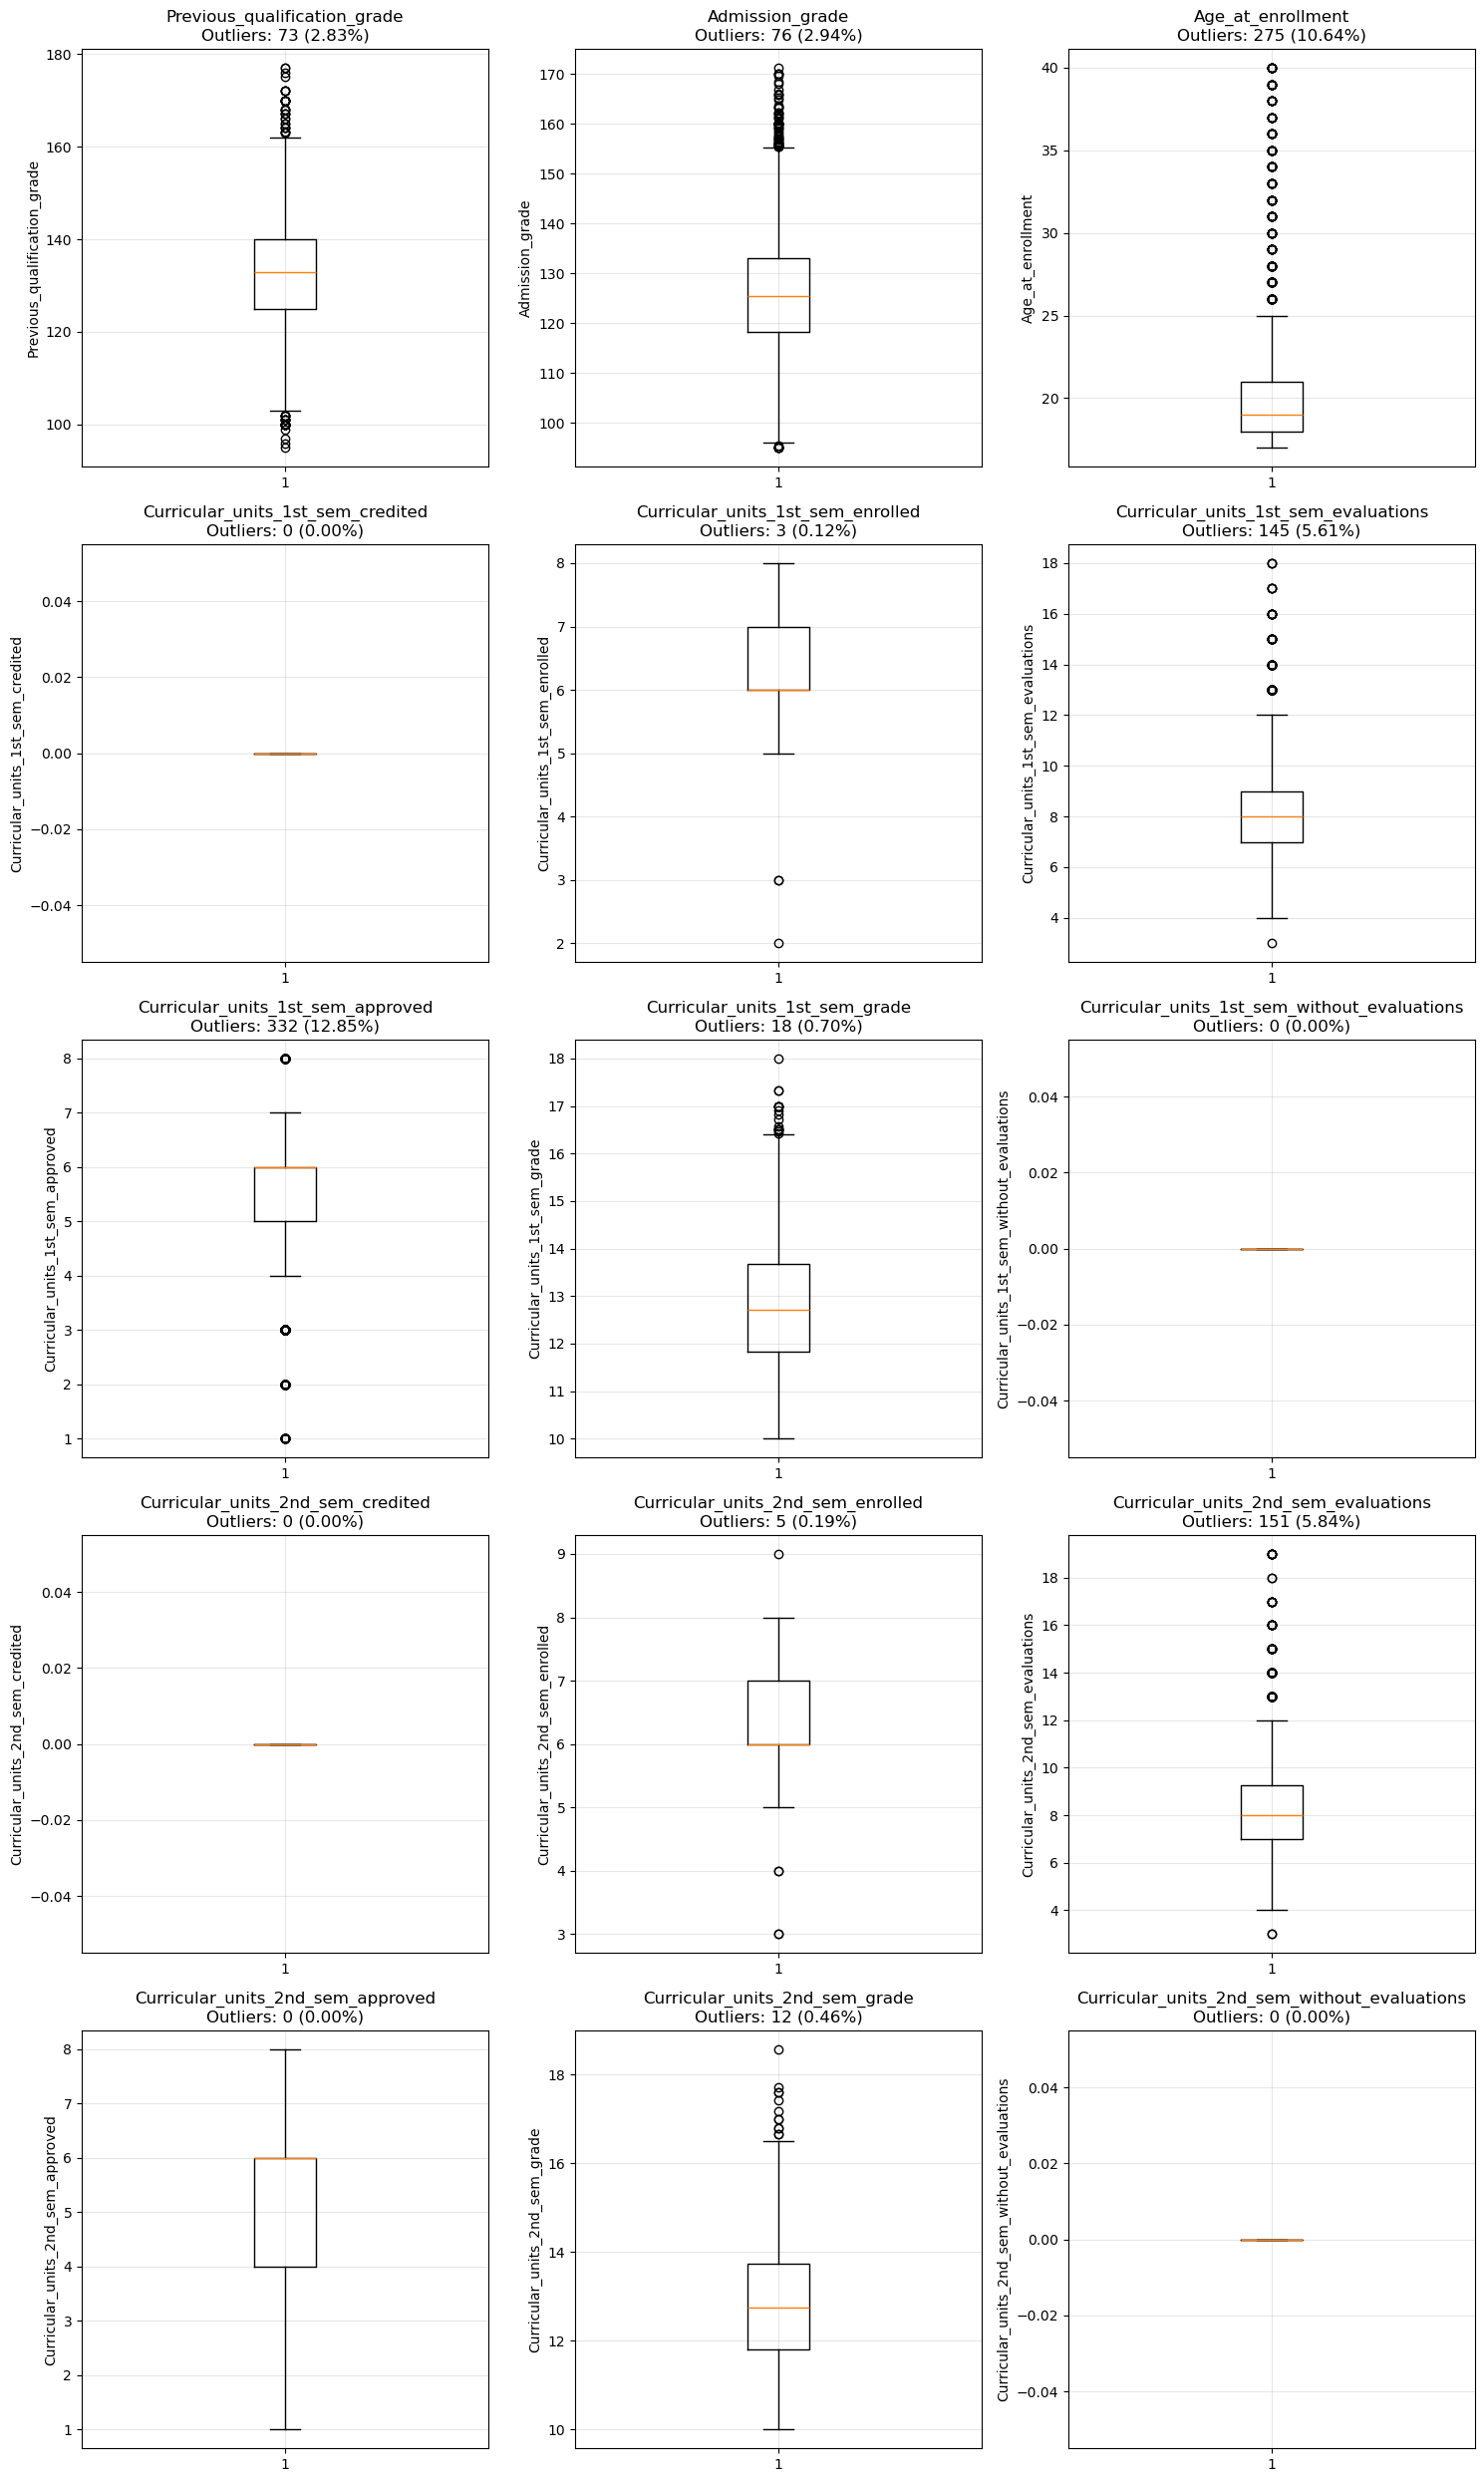

In [14]:
outliers = detect_outliers_iqr(df_clean)

In [15]:
df_clean['Status'].value_counts()

Status
Graduate    1668
Enrolled     506
Dropout      410
Name: count, dtype: int64

In [16]:
le = LabelEncoder()
df_clean['Status'] = le.fit_transform(df_clean['Status'])

In [17]:
status_dict = dict(zip(le.classes_, le.transform(le.classes_)))
print("Status encoding dictionary:", status_dict)

Status encoding dictionary: {'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}


In [18]:
X = df_clean.drop('Status', axis=1)
y = df_clean['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling

In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [21]:
y_pred = rf.predict(X_test_scaled)

## Evaluation

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7698

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.46      0.59        81
           1       0.61      0.41      0.49       104
           2       0.79      0.96      0.87       332

    accuracy                           0.77       517
   macro avg       0.75      0.61      0.65       517
weighted avg       0.76      0.77      0.75       517



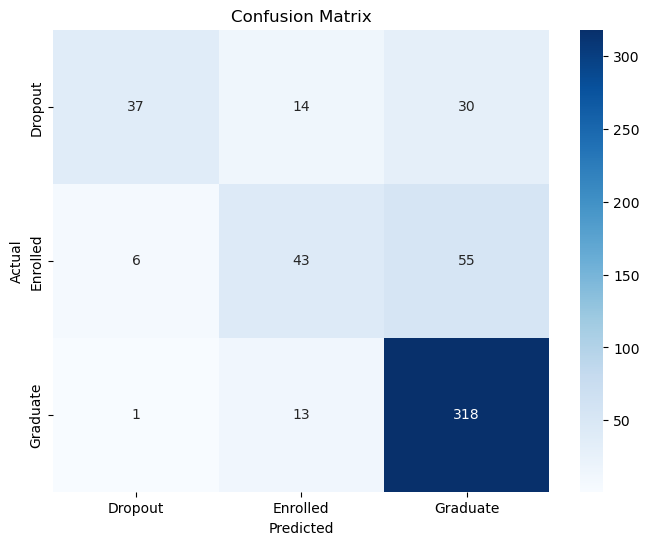

In [23]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Feature Importance:")
print(feature_importance.head(10))


Top 10 Feature Importance:
                                 feature  importance
30     Curricular_units_2nd_sem_approved    0.087151
31        Curricular_units_2nd_sem_grade    0.076108
24     Curricular_units_1st_sem_approved    0.070533
25        Curricular_units_1st_sem_grade    0.066534
12                       Admission_grade    0.058074
6           Previous_qualification_grade    0.050520
29  Curricular_units_2nd_sem_evaluations    0.048542
23  Curricular_units_1st_sem_evaluations    0.046670
3                                 Course    0.042003
11                    Fathers_occupation    0.039685


In [25]:
joblib.dump(rf, 'model/random_forest_model.pkl')
joblib.dump(scaler, 'model/scaler.pkl')

['model/scaler.pkl']